In [1]:
path = "../input/chest_xray/chest_xray/"
print(path)

../input/chest_xray/chest_xray/


In [2]:
from fastai import *
from fastai.vision import *

In [3]:
# set the batch size i.e. the number of images to train at a time
# reduce this number if you get an out of memory error 
bs = 64

In [4]:
# create a data bunch
np.random.seed(42)
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), 
                                  size=224, num_workers=0, 
                                  bs=bs, valid_pct=0.2).normalize(imagenet_stats)

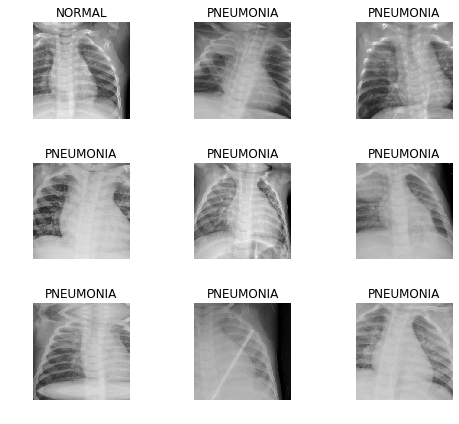

In [5]:
# display 3 rows of data
data.show_batch(rows=3, figsize=(7,6))

In [6]:
# verify the classes
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

In [7]:
# create a neural network
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 94587042.64it/s]


In [8]:
learn.to_fp16()

Learner(data=ImageDataBunch;

Train: LabelList (4685 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Valid: LabelList (1171 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

In [9]:
# fit 4 layers
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.365520,0.231434,0.081127,05:57
1,0.214725,0.216232,0.069172,05:33
2,0.174274,0.205380,0.066610,05:36
3,0.156857,0.212592,0.073442,05:30


In [10]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

In [11]:
learn.to_fp32()

Learner(data=ImageDataBunch;

Train: LabelList (4685 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Valid: LabelList (1171 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

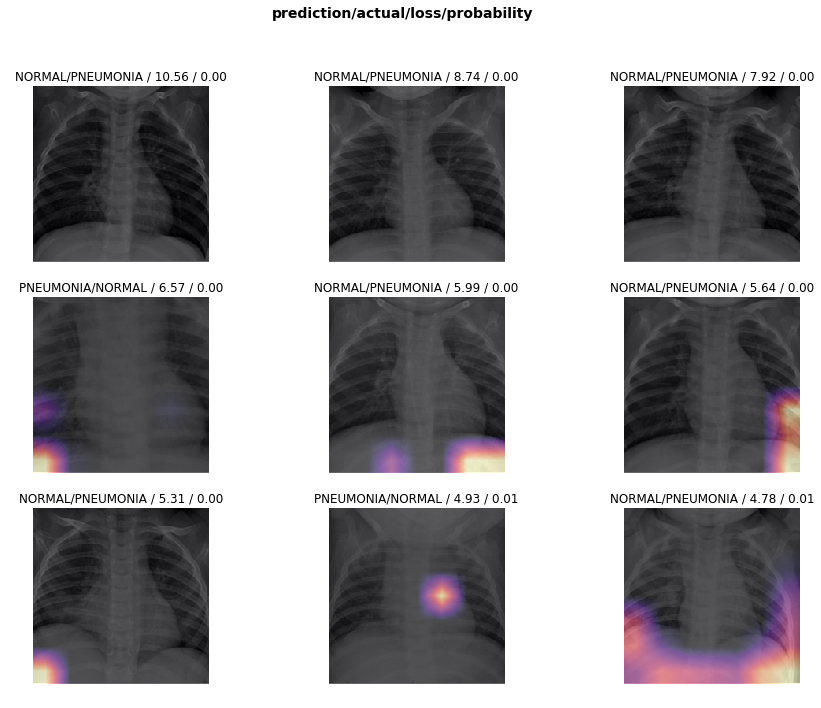

In [12]:
# plot the top losses
interp.plot_top_losses(9, figsize=(15,11))

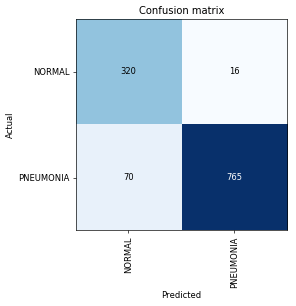

In [13]:
# plot the confusion matrix
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [14]:
learn.save('/kaggle/working/stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.to_fp16()

Learner(data=ImageDataBunch;

Train: LabelList (4685 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Valid: LabelList (1171 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,NORMAL,NORMAL,NORMAL
Path: ../input/chest_xray/chest_xray;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

In [17]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.145884,0.121837,0.045260,05:45


In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


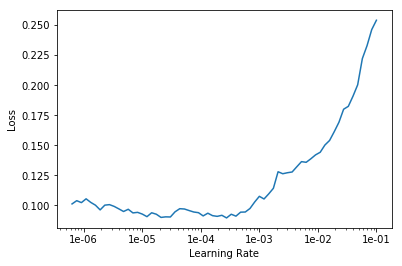

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.090463,0.106484,0.040991,05:40
1,0.085121,0.117785,0.041845,05:39


In [21]:
# interpret the results
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

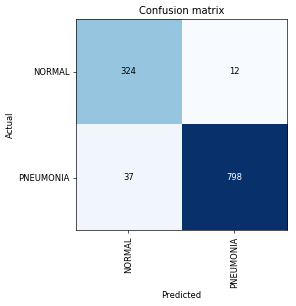

In [22]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

We have managed to significantly reduce the error rate and predict the Pneumonia cases correctly which is the class we care about!

In [23]:
learn.save('/kaggle/working/stage-2')